# Proyecto 2

### Evolución anual de los precios de alquiler en Barcelona

## Librerías y más librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import os
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import folium
from folium.plugins import FastMarkerCluster

In [3]:
#to make the plotly graphs
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud


import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)#to make the plotly graphs
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud


import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

## Importar datos

listings contien datos básicos de las propiedades anunciadas en AirBnB en barcelona -- ver colummns --.

In [4]:
listings_path = r"C:\Users\34699\OneDrive\Escritorio\bootcamp\Modulo2\Proyecto2\listings.csv"
listings = pd.read_csv(listings_path, index_col="id")

In [ ]:
listings.columns

Muchos más datos de las propiedades. Elegir los convenientes.

In [5]:
listings_data_path = r"C:\Users\34699\OneDrive\Escritorio\bootcamp\Modulo2\Proyecto2\listings_data.csv"
listings_details = pd.read_csv(listings_data_path, index_col="id", low_memory=False)

In [ ]:
listings_details.columns

Traemos a listings el dato de la cantidad de personas que puede alojar cada vivienda en alquiler.

In [6]:
target_columns = ["accommodates"]
listings = pd.merge(listings, listings_details[target_columns], on='id', how='left')
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17230 entries, 18674 to 909387630966968007
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            17230 non-null  object 
 1   host_id                         17230 non-null  int64  
 2   host_name                       17228 non-null  object 
 3   neighbourhood_group             17230 non-null  object 
 4   neighbourhood                   17230 non-null  object 
 5   latitude                        17230 non-null  float64
 6   longitude                       17230 non-null  float64
 7   room_type                       17230 non-null  object 
 8   price                           17230 non-null  int64  
 9   minimum_nights                  17230 non-null  int64  
 10  number_of_reviews               17230 non-null  int64  
 11  last_review                     13198 non-null  object 
 12  reviews_per_month   

Importamos calendar. Contiene para cada propiedad el precio al que se anunciaba en cada fecha y su disponibilidad.

In [7]:
calendar_data_path = r"C:\Users\34699\OneDrive\Escritorio\bootcamp\Modulo2\Proyecto2\calendar_data.csv"
calendar = pd.read_csv(
    calendar_data_path,
    parse_dates=['date'], # A formato fecha las fechas
    index_col=['listing_id'], # Fijamos índice
    dtype={'price': 'str'} 
)

In [8]:
#Convertir precio a float
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)
calendar.head()

,date,available,price,adjusted_price,minimum_nights,maximum_nights
listing_id,,,,,,
18674,2023-06-10,f,210.0,$210.00,4.0,1125.0
18674,2023-06-11,f,210.0,$210.00,4.0,1125.0
18674,2023-06-12,f,210.0,$210.00,4.0,1125.0
18674,2023-06-13,f,210.0,$210.00,4.0,1125.0
18674,2023-06-14,f,210.0,$210.00,2.0,1125.0


Datos de las reseñas de los clientes 

In [9]:
reviews_data_path = r"C:\Users\34699\OneDrive\Escritorio\bootcamp\Modulo2\Proyecto2\reviews_data.csv"
reviews_details = pd.read_csv(reviews_data_path, parse_dates=['date'])

In [ ]:
reviews_details.head()

In [10]:
neighbourhoods_path = r"C:\Users\34699\OneDrive\Escritorio\bootcamp\Modulo2\Proyecto2\neighbourhoods.csv"
neighbourhoods = pd.read_csv(neighbourhoods_path)

In [11]:
reviews_path = r"C:\Users\34699\OneDrive\Escritorio\bootcamp\Modulo2\Proyecto2\reviews.csv"
reviews = pd.read_csv(reviews_path)

In [ ]:
#Nube de palabras de las reviews
text = " ".join(comment for comment in reviews_details['comments'].dropna())


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
lats = listings['latitude'].tolist()
lons = listings['longitude'].tolist()

locations = list(zip(lats, lons))

map1 = folium.Map(location=[41.39631,2.16832], zoom_start=10)

FastMarkerCluster(data=locations).add_to(map1)

map1.save("map1.html")
map1

In [ ]:
desc_1 = listings['neighbourhood_group'].value_counts().sort_values(ascending=True)


desc_1.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title('Anuncios por barrio', fontsize=20)
plt.xlabel('Anuncios', fontsize=12)
plt.ylabel('Barrios', fontsize=12)
plt.show()

Dos nuevas columnas:

- Precio_normalizado: El precio de cada anuncio dividido entre su media anual. Mide el valor de la propiedad en el tiempo respecto a sí misma.


- Precio_NMt: El precio dividido entre la mediana, si la propiedad estaba disponible (no ocupada), entonces Precio_NMt=0. Misma idea, añadimos si la propiedad estaba disponible no estaba siendo rentabilizada, de ahí Precio_NMt=0.

In [12]:
import pandas as pd

# Primero, calculamos el precio medio y mediano por listing_id
precio_medio = calendar.groupby('listing_id')['price'].mean()
precio_mediano = calendar.groupby('listing_id')['price'].median()
# Añadimos nuevas columna 
calendar['precio_medio'] = calendar.index.map(precio_medio)
calendar['precio_mediano'] = calendar.index.map(precio_mediano)

# Calculamos la columna 'precio_normalizado'
calendar['precio_normalizado'] = calendar['price'] / calendar['precio_medio']

# Definimos la función para asignar cero si 'available' es 't'
def asignar_valor(row):
    if row['available'] == 't':
        return 0
    else:
        return row['price'] / row['precio_mediano']

# Aplicamos la función a la columna 'price' para crear 'precio_NM'
calendar['precio_NMt'] = calendar.apply(asignar_valor, axis=1)

# Eliminamos la columna temporal 'precio_medio' y 'precio_mediano' si ya no son necesarias
calendar.drop(columns=['precio_medio', 'precio_mediano'], inplace=True)

# Ver resultados
calendar.head()



,date,available,price,adjusted_price,minimum_nights,maximum_nights,precio_normalizado,precio_NMt
listing_id,,,,,,,,
18674,2023-06-10,f,210.0,$210.00,4.0,1125.0,1.115574,1.160221
18674,2023-06-11,f,210.0,$210.00,4.0,1125.0,1.115574,1.160221
18674,2023-06-12,f,210.0,$210.00,4.0,1125.0,1.115574,1.160221
18674,2023-06-13,f,210.0,$210.00,4.0,1125.0,1.115574,1.160221
18674,2023-06-14,f,210.0,$210.00,2.0,1125.0,1.115574,1.160221


In [ ]:
freq = listings['room_type'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=1, color=["g", "b", "r"])
plt.xlabel('Frecuencia')
plt.ylabel('Tipo de Habitación')
plt.title('Frecuencia de Tipos de Habitación en Listings')
plt.show()

In [ ]:
feq = listings_details['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='b', width=1, rot=0)
plt.title("Número de ocupantes", fontsize=20)
plt.ylabel('Anuncios', fontsize=12)
plt.xlabel('Ocupantes', fontsize=12)
plt.savefig("accommodates_distribution")

Nos restringimos a aquellos anuncios cuyo precio varía en el tiempo. Son los que nos interesan para el estudio a realizar.

In [13]:
# Suponiendo que calendar es tu DataFrame original

# Paso 1: Identificar los listing_id que tienen variaciones en el precio
# Agrupamos por listing_id y chequeamos la variación en los precios
listing_ids_con_variacion = calendar.groupby('listing_id')['price'].nunique()
listing_ids_con_variacion = listing_ids_con_variacion[listing_ids_con_variacion > 1].index

# Paso 2: Filtrar el DataFrame original para incluir solo estos listing_id
cal_var = calendar[calendar.index.isin(listing_ids_con_variacion)]

# Verifica los resultados
cal_var.head()


,date,available,price,adjusted_price,minimum_nights,maximum_nights,precio_normalizado,precio_NMt
listing_id,,,,,,,,
18674,2023-06-10,f,210.0,$210.00,4.0,1125.0,1.115574,1.160221
18674,2023-06-11,f,210.0,$210.00,4.0,1125.0,1.115574,1.160221
18674,2023-06-12,f,210.0,$210.00,4.0,1125.0,1.115574,1.160221
18674,2023-06-13,f,210.0,$210.00,4.0,1125.0,1.115574,1.160221
18674,2023-06-14,f,210.0,$210.00,2.0,1125.0,1.115574,1.160221


La columna 'fecha_numerica' es cómoda para el manejo del dato fecha. Toma valor 0 en el primer dia de los datos y sucesivamente 1,2,3,...

In [14]:
cal_var['date'] = pd.to_datetime(cal_var['date'])
fecha_minima = cal_var['date'].min()

cal_var['fecha_numerica'] = (cal_var['date'] - fecha_minima).dt.days

cal_var.tail(20)

,date,available,price,adjusted_price,minimum_nights,maximum_nights,precio_normalizado,precio_NMt,fecha_numerica
listing_id,,,,,,,,,
40983,2024-05-20,f,130.0,$130.00,2.0,364.0,0.991516,1.0,345
40983,2024-05-21,f,130.0,$130.00,2.0,364.0,0.991516,1.0,346
40983,2024-05-22,f,130.0,$130.00,2.0,364.0,0.991516,1.0,347
40983,2024-05-23,f,130.0,$130.00,2.0,364.0,0.991516,1.0,348
40983,2024-05-24,f,130.0,$130.00,2.0,364.0,0.991516,1.0,349
40983,2024-05-25,f,130.0,$130.00,2.0,364.0,0.991516,1.0,350
40983,2024-05-26,f,130.0,$130.00,2.0,364.0,0.991516,1.0,351
40983,2024-05-27,f,130.0,$130.00,2.0,364.0,0.991516,1.0,352
40983,2024-05-28,f,130.0,$130.00,2.0,364.0,0.991516,1.0,353


Breve análisis de la variación temporal del precio de una propiedad concreta cualquiera.

In [15]:
df2 = cal_var.loc[cal_var.index == 18674]

In [ ]:
df2.head()

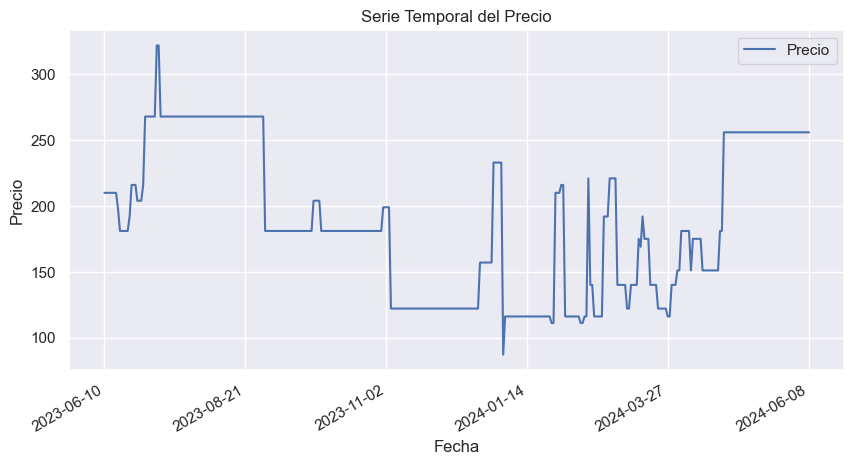

In [16]:
#date a formato fecha
df2['date'] = pd.to_datetime(df2['date'])

# Ordenamos por 'date'
df2 = df2.sort_values(by='date')

# Date a índice
df2.set_index('date', inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df2.index, df2['price'], label='Precio')

# Configurar etiquetas
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Serie Temporal del Precio')
plt.legend()
plt.grid(True)

plt.xticks(pd.date_range(start=df2.index.min(), end=df2.index.max(), periods=6))

plt.gcf().autofmt_xdate()

plt.show()

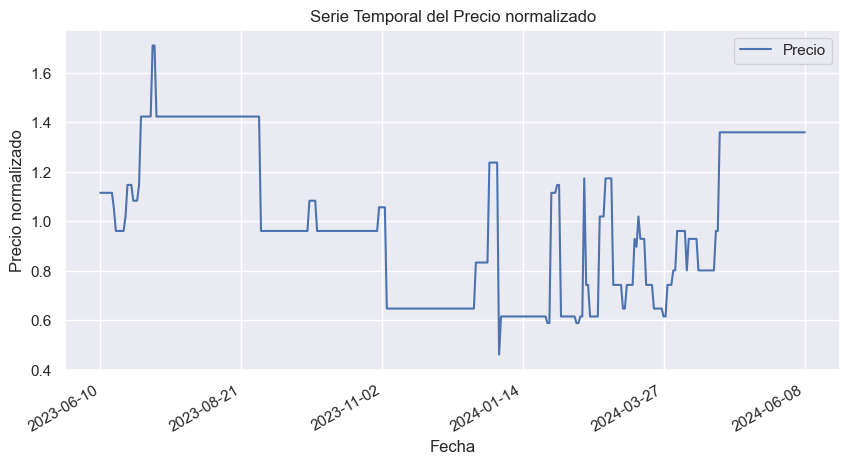

In [17]:

plt.figure(figsize=(10, 5))
plt.plot(df2.index, df2['precio_normalizado'], label='Precio')


plt.xlabel('Fecha')
plt.ylabel('Precio normalizado')
plt.title('Serie Temporal del Precio normalizado')
plt.legend()
plt.grid(True)

plt.xticks(pd.date_range(start=df2.index.min(), end=df2.index.max(), periods=6))

plt.gcf().autofmt_xdate()

plt.show()

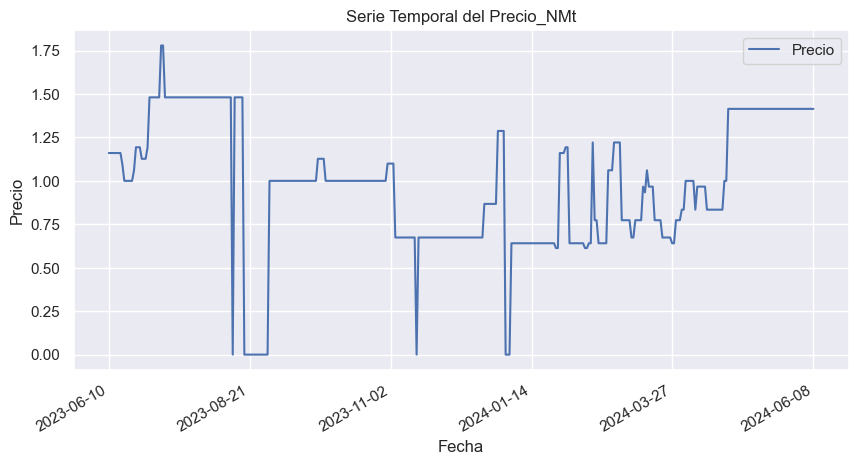

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(df2.index, df2['precio_NMt'], label='Precio')

plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Serie Temporal del Precio_NMt')
plt.legend()
plt.grid(True)

plt.xticks(pd.date_range(start=df2.index.min(), end=df2.index.max(), periods=6))

# Rotar las etiquetas del eje x para mejor legibilidad
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.show()

Estas funciones suavizan las series. Toman el valor promedio de cada una en un intervalo de tiempo de 90 días centrado en cada día.

In [19]:
import pandas as pd

def pmr(x):
    e = 45
    return df2[(df2['fecha_numerica'] >= x - e) & (df2['fecha_numerica'] <= x + e)]['price'].mean()


In [20]:
def pmr_N(x):
    e = 45
    return df2[(df2['fecha_numerica'] >= x - e) & (df2['fecha_numerica'] <= x + e)]['precio_normalizado'].mean()

In [21]:
def pmr_NMt(x):
    e = 45
    return df2[(df2['fecha_numerica'] >= x - e) & (df2['fecha_numerica'] <= x + e)]['precio_NMt'].mean()

In [ ]:
# Valores de x para los cuales calcular la función suavizante
x_values = range(0,365)

# Media precios en un rango alrededor de cada valor de x
Pmr = [pmr(x) for x in x_values]

#Representamos 

plt.plot(x_values, Pmr, color='red', label='f(x)')

plt.show()

In [ ]:
# Valores de x para los cuales calcular la función suavizante
x_values = range(0,365)

# Media precios normalizados en un rango alrededor de cada valor de x
pnmr = [pmr_N(x) for x in x_values]

#Representamos

plt.plot(x_values, pnmr, color='red', label='f(x)')

plt.show()

In [ ]:
# Valores de x para los cuales calcular la función suavizante
x_values = range(0,365)

# Media precios_NMt en un rango alrededor de cada valor de x
Pnmtmr = [pmr_NMt(x) for x in x_values]

#Representamos

plt.plot(df2.index, Pnmtmr, color='red', label='f(x)')

plt.show()

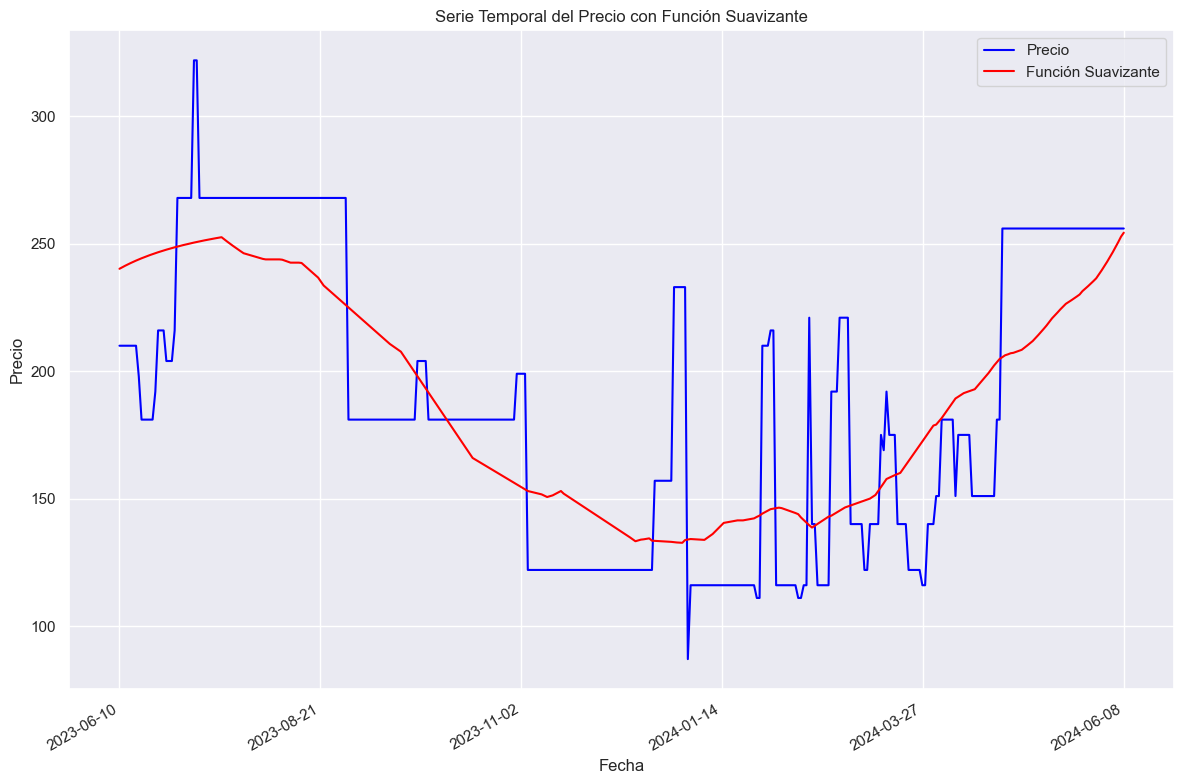

<Figure size 640x480 with 0 Axes>

In [22]:
from scipy.interpolate import interp1d


x_values = range(0, 365)

Pmr = [pmr(x) for x in x_values]  

plt.figure(figsize=(12, 8))

plt.plot(df2.index, df2['price'], label='Precio', color='blue')

plt.plot(df2.index, Pmr, color='red', label='Función Suavizante')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Serie Temporal del Precio con Función Suavizante')
plt.legend()
plt.grid(True)
plt.xticks(pd.date_range(start=df2.index.min(), end=df2.index.max(), periods=6))
plt.gcf().autofmt_xdate()


plt.savefig('serie_temporal_precio_con_suavizante.png', dpi=300)  # dpi ajusta la resolución del gráfico


plt.tight_layout()
plt.show()
plt.savefig('Serie temporal precio medio suavizada.png')

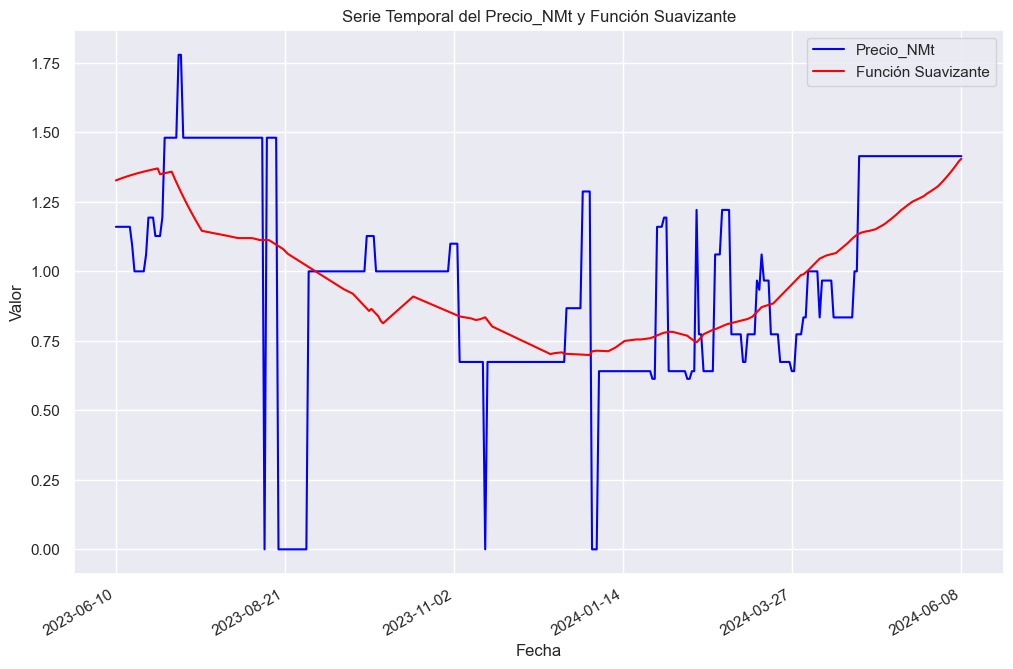

In [24]:
x_values = range(0, 365)
Pnmtmr = [pmr_NMt(x) for x in x_values]  
plt.figure(figsize=(12, 8))
plt.plot(df2.index, df2['precio_NMt'], label='Precio_NMt', color='blue')
plt.plot(df2.index, Pnmtmr, color='red', label='Función Suavizante')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Temporal del Precio_NMt y Función Suavizante')
plt.legend()
plt.grid(True)
plt.xticks(pd.date_range(start=df2.index.min(), end=df2.index.max(), periods=6))
plt.gcf().autofmt_xdate()

plt.savefig('Precio_NMt_y_Suavizante.png')

plt.show()

Para trastear con cal_var y listings creamos nuevos data sets a modode cortafuegos.

In [ ]:
C2=cal_var
L2=listings

In [ ]:
C2.reset_index(inplace=True)
L2.reset_index(inplace=True)

Traemos el número de ocupantes a C2 (cal_var). 

In [ ]:
L2 = L2.rename(columns={'id': 'listing_id'})


C2 = C2.merge(L2[['listing_id', 'latitude', 'longitude','accommodates']], on='listing_id', how='left')


Definimos la columna precio por ocupante.

In [ ]:
C2['prc_por_acc']=C2['price']/C2['accommodates']

In [ ]:
C2.isnull().sum()

In [ ]:
C2.dropna()

In [ ]:
C2.head()

La función haversine mide la distancia mediada sobre la superficie terrestre entre dos puntos dados por latitud y longitud.

In [ ]:
import math

def haversine(lat1, lon1, lat2, lon2):
    # Convertir de grados a radianes
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    
    # Radio de la Tierra en km
    r = 6371
    
    # Diferencias
    delta_lat = lat2 - lat1
    delta_lon = lon2 - lon1
    
    # Fórmula de Haversine
    a = math.sin(delta_lat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(delta_lon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # Distancia en kilómetros
    distance_km = r * c
    
    # Convertir la distancia a metros
    distance_m = distance_km * 1000
    
    return distance_m

# Ejemplo de uso
lat1, lon1 = 40.712776, -74.005974  # Nueva York
lat2, lon2 = 34.052235, -118.243683  # Los Ángeles

distancia = haversine(lat1, lon1, lat2, lon2)
print(f"La distancia es {distancia} metros")

Funciones para medir los promedios de las valoraciones (absoliutas y normalizadas) de las propiedades en un radio de distancia a cada punto en una determinada fecha.  

In [ ]:
def precio_medio_en_radio(latitud, longitud, fecha):
    radio = 60 
    filtro_fecha = C2[C2['fecha_numerica'] == fecha]
    
    distancias = filtro_fecha.apply(lambda row: haversine(latitud, longitud, row['latitude'], row['longitude']), axis=1)

    anuncios_en_radio = filtro_fecha[distancias < radio]

    if anuncios_en_radio.empty:
        return 0
    else:
        precio_medio = anuncios_en_radio['price'].mean()
        return precio_medio


In [ ]:
def precio_por_acc_medio_en_radio(latitud, longitud, fecha):
    radio = 100  # Radio de 100 metros en términos de latitud y longitud (aproximadamente)
    filtro_fecha = C2[C2['fecha_numerica'] == fecha]
    
    distancias = filtro_fecha.apply(lambda row: haversine(latitud, longitud, row['latitude'], row['longitude']), axis=1)

    anuncios_en_radio = filtro_fecha[distancias < radio]

    if anuncios_en_radio.empty:
        return 0
    else:
        precio_medio = anuncios_en_radio['prc_por_acc'].mean()
        return precio_medio

Por una cuestión de coste computacional es necesario trabajar con estas funciones; toman el valor promedio en un cuadrado centrado en cada punto.

In [ ]:

def precio_medio_en_cuadrado(latitud, longitud, fecha):
    radio = 0.001  # Radio de 100 metros en términos de latitud y longitud (aproximadamente)
    filtro_fecha = C2[C2['fecha_numerica'] == fecha]

    anuncios_en_radio = filtro_fecha[(abs(filtro_fecha['latitude'] - latitud) < radio) & (abs(filtro_fecha['longitude'] - longitud) < radio)]

    if anuncios_en_radio.empty:
        return 0
    else:
        precio_medio = anuncios_en_radio['price'].mean()
        return precio_medio


In [ ]:
def precio_por_acc_medio_en_cuadrado(latitud, longitud, fecha):
    radio = 0.001  # Radio de 100 metros en términos de latitud y longitud (aproximadamente)
    filtro_fecha = C2[C2['fecha_numerica'] == fecha]
    
    anuncios_en_radio = filtro_fecha[(abs(filtro_fecha['latitude'] - latitud) < radio) & (abs(filtro_fecha['longitude'] - longitud) < radio)]

    if anuncios_en_radio.empty:
        return 0
    else:
        precio_medio = anuncios_en_radio['prc_por_acc'].mean()
        return precio_medio

Valores de prueba.

In [ ]:
precio_medio_en_radio(41.39631,2.16832,0)

In [ ]:
precio_medio_en_cuadrado(41.39631,2.16832,0)

In [ ]:
precio_por_acc_medio_en_radio(41.39631,2.16832,0)

In [ ]:
precio_por_acc_medio_en_cuadrado(41.39631,2.16832,0)


Coordenadas del centro de Barcelona:

     [41.3851, 2.1734]


Análogas funciones respecto a precios normalizados.

In [ ]:
def precio_N_medio_en_radio(latitud, longitud, fecha):
    radio = 100  # Radio de 100 metros en términos de latitud y longitud (aproximadamente)
    filtro_fecha = C2[C2['fecha_numerica'] == fecha]

    distancias = filtro_fecha.apply(lambda row: haversine(latitud, longitud, row['latitude'], row['longitude']), axis=1)

    anuncios_en_radio = filtro_fecha[distancias < radio]

    if anuncios_en_radio.empty:
        return 0
    else:
            # Calcular la media ponderada en función de la columna 'price'
        precio_medio_N = np.average(anuncios_en_radio['precio_normalizado'], weights=anuncios_en_radio['price'])

        return precio_medio_N

In [ ]:
def precio_NMt_medio_en_radio(latitud, longitud, fecha):
    radio = 100  # Radio de 100 metros en términos de latitud y longitud (aproximadamente)
    filtro_fecha = C2[C2['fecha_numerica'] == fecha]

    distancias = filtro_fecha.apply(lambda row: haversine(latitud, longitud, row['latitude'], row['longitude']), axis=1)

    anuncios_en_radio = filtro_fecha[distancias < radio]

    if anuncios_en_radio.empty:
        return 0
    else:
            # Calcular la media ponderada en función de la columna 'price'
        precio_medio_NMt = np.average(anuncios_en_radio['precio_NMt'], weights=anuncios_en_radio['price'])

        return precio_medio_NMt

In [ ]:
def precio_N_medio_en_cuadrado(latitud, longitud, fecha):
    radio = 0.001  # Radio de 100 metros en términos de latitud y longitud (aproximadamente)
    filtro_fecha = C2[C2['fecha_numerica'] == fecha]

    anuncios_en_radio = filtro_fecha[(abs(filtro_fecha['latitude'] - latitud) < radio) & (abs(filtro_fecha['longitude'] - longitud) < radio)]

    if anuncios_en_radio.empty:
        return 0
    else:
            # Calcular la media ponderada en función de la columna 'price'
        precio_medio_N = np.average(anuncios_en_radio['precio_normalizado'], weights=anuncios_en_radio['price'])

        return precio_medio_N


In [ ]:
def precio_NMt_medio_en_cuadrado(latitud, longitud, fecha):
    radio = 0.001  # Radio de 100 metros en términos de latitud y longitud (aproximadamente)
    filtro_fecha = C2[C2['fecha_numerica'] == fecha]

    anuncios_en_radio = filtro_fecha[(abs(filtro_fecha['latitude'] - latitud) < radio) & (abs(filtro_fecha['longitude'] - longitud) < radio)]

    if anuncios_en_radio.empty:
        return 0
    else:
            # Calcular la media ponderada en función de la columna 'price'
        precio_medio_NMt = np.average(anuncios_en_radio['precio_NMt'], weights=anuncios_en_radio['price'])

        return precio_medio_NMt

Valores de prueba.

In [ ]:
precio_N_medio_en_radio(41.3851, 2.1734,0)

In [ ]:
precio_NMt_medio_en_radio(41.3851, 2.1734,0)

In [ ]:
precio_N_medio_en_cuadrado(41.3851, 2.1734,0)

In [ ]:
precio_NMt_medio_en_cuadrado(41.3851, 2.1734,0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Coordenadas de Barcelona
lat_barcelona = 41.3851
lon_barcelona = 2.1734

# Definir la malla de 30x30 en el cuadrado de 10 km alrededor de Barcelona
latitudes = np.linspace(lat_barcelona - 0.06, lat_barcelona + 0.06, 50)
longitudes = np.linspace(lon_barcelona - 0.06, lon_barcelona + 0.06, 50)

# Crear una matriz para almacenar los valores
valores = np.zeros((50, 50))

# Calcular el precio medio en radio para cada celda de la malla
for i, lat in enumerate(latitudes):
    for j, lon in enumerate(longitudes):
        valores[i, j] = precio_por_acc_medio_en_radio(lat, lon, 0)



In [ ]:
# Crear un mapa de colores de azul a rojo para visualizar los valores con límites personalizados
plt.imshow(valores, cmap='coolwarm', interpolation='bicubic', vmin=7, vmax=80)  # Ajusta los límites de color según tus datos
plt.colorbar()
plt.show()

In [ ]:
# Coordenadas de Barcelona
lat_barcelona = 41.3851
lon_barcelona = 2.1734
# Definir la malla de 30x30 en el cuadrado de 10 km alrededor de Barcelona
latitudes = np.linspace(lat_barcelona - 0.06, lat_barcelona + 0.06, 40)
longitudes = np.linspace(lon_barcelona - 0.06, lon_barcelona + 0.06, 40)

In [ ]:
import pandas as pd

# Crear listas para almacenar los datos de latitud, longitud y precio_medio_en_radio
datos = []

# Iterar sobre cada celda de la malla para extraer la información
for i, lat in enumerate(latitudes):
    for j, lon in enumerate(longitudes):
        latitud = lat
        longitud = lon
        datos.append([latitud, longitud])

# Crear un DataFrame de Pandas con los datos recopilados
df = pd.DataFrame(datos, columns=['Latitud', 'Longitud'])

df.head(20)


In [ ]:
df['precio_medio_en_cuadrado'] = df.apply(lambda row: precio_medio_en_cuadrado(row['Latitud'], row['Longitud'], 0), axis=1)

In [ ]:
df['precio_por_acc_medio_en_cuadrado'] = df.apply(lambda row: precio_por_acc_medio_en_cuadrado(row['Latitud'], row['Longitud'], 0), axis=1)

In [ ]:
df['precio_medio_en_radio'] = df.apply(lambda row: precio_medio_en_radio(row['Latitud'], row['Longitud'], 0), axis=1)

In [ ]:
df['precio_por_acc_medio_en_radio'] = df.apply(lambda row: precio_por_acc_medio_en_radio(row['Latitud'], row['Longitud'], 0), axis=1)

In [ ]:
df['precio_N_medio_en_radio'] = df.apply(lambda row: precio_N_medio_en_radio(row['Latitud'], row['Longitud'], 0), axis=1)

In [ ]:
df['precio_NMt_medio_en_radio'] = df.apply(lambda row: precio_NMt_medio_en_radio(row['Latitud'], row['Longitud'], 0), axis=1)

In [ ]:
import folium
from folium.plugins import HeatMap


# Filtrar los datos necesarios y eliminar valores nulos y valores igual a 0
heat_data = df[['Latitud', 'Longitud', 'precio_por_acc_medio_en_radio']].loc[df['precio_por_acc_medio_en_radio'] > 0].dropna()

# Crear el mapa base centrado en la media de las latitudes y longitudes de tus datos
m = folium.Map(location=[heat_data['Latitud'].mean(), heat_data['Longitud'].mean()], tiles='cartodbpositron', zoom_start=12)

# Preparar los datos para el HeatMap
heat_data_list = heat_data.values.tolist()

# Agregar datos de HeatMap al mapa base con escala de colores personalizada de azul a rojo
HeatMap(data=heat_data_list, radius=16, max_zoom=13, gradient={0.0: 'blue', 0.3: 'cyan', 0.5: 'white', 0.6: 'yellow', 1.0: 'red'},min_opacity=0.4).add_to(m)

# Mostrar el mapa
m


In [ ]:
import folium
from folium.plugins import HeatMap


# Filtrar los datos necesarios y eliminar valores nulos y valores igual a 0
heat_data = df[['Latitud', 'Longitud', 'precio_NMt_medio_en_radio']].loc[df['precio_NMt_medio_en_radio'] > 0].dropna()

# Crear el mapa base centrado en la media de las latitudes y longitudes de tus datos
n = folium.Map(location=[heat_data['Latitud'].mean(), heat_data['Longitud'].mean()], tiles='cartodbpositron', zoom_start=12)

# Preparar los datos para el HeatMap
heat_data_list = heat_data.values.tolist()

# Agregar datos de HeatMap al mapa base con escala de colores personalizada de azul a rojo
HeatMap(data=heat_data_list, radius=16, max_zoom=13, gradient={0.0: 'blue', 0.3: 'cyan', 0.5: 'white', 0.6: 'yellow', 1.0: 'red'},min_opacity=0.4).add_to(n)

# Mostrar el mapa
n

In [ ]:
freq = listings['room_type'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=1, color=["g", "b", "r"])
plt.xlabel('Frecuencia')
plt.ylabel('Tipo de Habitación')
plt.title('Frecuencia de Tipos de Habitación en Listings')
plt.show()
 

In [ ]:
feq = listings_details['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='b', width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()
 

In [ ]:
import pandas as pd

# Lista de días (números pares)
dias_pares = range(0, 365, 2)  # Suponiendo que 'dias' contiene los días de tus datos

# Crear un DataFrame auxiliar para almacenar los datos generados
nuevas_columnas = {}

# Generar columnas para cada día múltiplo de tres y guardar en el DataFrame auxiliar
for dia in dias_pares:
    nombre_col_ppam = f'ppam_{dia}'
    nombre_col_pn = f'pNm_{dia}'
    nombre_col_pnm = f'pNMtm_{dia}'
    
    nuevas_columnas[nombre_col_ppam] = df.apply(lambda row: precio_por_acc_medio_en_cuadrado(row['Latitud'], row['Longitud'], dia), axis=1)
    nuevas_columnas[nombre_col_pn] = df.apply(lambda row: precio_N_medio_en_cuadrado(row['Latitud'], row['Longitud'], dia), axis=1)
    nuevas_columnas[nombre_col_pnm] = df.apply(lambda row: precio_NMt_medio_en_cuadrado(row['Latitud'], row['Longitud'], dia), axis=1)
# Crear un DataFrame con las nuevas columnas
nuevas_columnas_df = pd.DataFrame(nuevas_columnas)

# Combinar el DataFrame original con el DataFrame de las nuevas columnas
df = pd.concat([df, nuevas_columnas_df], axis=1)



In [ ]:
df.head()

In [ ]:
df.columns


In [ ]:
import folium

# Definir las rutas de las carpetas de destino
carpeta_ppam = 'Mapa_ppam'
carpeta_pNm = 'Mapa_pNm'

for col in df.columns:
    if 'ppam' in col:
        carpeta_destino = carpeta_ppam
    elif 'pNm' in col:
        carpeta_destino = carpeta_pNm
    else:
        continue

    heat_data = df[['Latitud', 'Longitud', col]].loc[df[col] > 0].dropna()

    m = folium.Map(location=[heat_data['Latitud'].mean(), heat_data['Longitud'].mean()], tiles='cartodbpositron', zoom_start=12)

    heat_data_list = heat_data.values.tolist()

    HeatMap(data=heat_data_list, radius=16, max_zoom=13, gradient={0.0: 'blue', 0.3: 'cyan', 0.5: 'white', 0.6: 'yellow', 1.0: 'red'}, min_opacity=0.4).add_to(m)

    # Guardar el mapa en la carpeta correspondiente
    nombre_mapa = f'mapa_{col}.html'
    ruta_mapa = os.path.join(carpeta_destino, nombre_mapa)
    m.save(ruta_mapa)



In [ ]:
import imageio
import os
from PIL import Image
import numpy as np

# Directorio donde se encuentran los archivos PNG de los mapas
directorio = 'c:/Users/34699/OneDrive/Escritorio/bootcamp/Modulo2/Proyecto2/Mapa_pNm'

# Lista para almacenar los nombres de los archivos PNG
archivos_mapas = [nombre_archivo for nombre_archivo in os.listdir(directorio) if nombre_archivo.endswith('.png')]

# Ordenar los nombres de los archivos
archivos_mapas.sort()

# Lista para almacenar las imágenes de los mapas
imagenes_mapas = []

# Cargar cada imagen PNG y redimensionarlas a un tamaño común
ancho_comun = 800
alto_comun = 600

for nombre_archivo in archivos_mapas:
    imagen = imageio.imread(os.path.join(directorio, nombre_archivo))
    imagen_redimensionada = Image.fromarray(imagen).resize((ancho_comun, alto_comun))
    imagenes_mapas.append(np.asarray(imagen_redimensionada))

# Guardar la animación como un video
ruta_video_salida = "animacion_mapas.mp4"
imageio.mimsave(ruta_video_salida, imagenes_mapas, fps=1)  # fps es la velocidad de fotogramas por segundo

print("Se ha creado la animación de los mapas correctamente.")



In [ ]:
df.to_csv('df_graficos.csv')

In [ ]:
df=pd.read_csv('df_graficos.csv')
df=df.drop(columns='Unnamed: 0')
df.head()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear la rejilla en 2D
x = np.unique(df['Longitud'])
y = np.unique(df['Latitud'])
X, Y = np.meshgrid(x, y)

# Reformatear los valores de la función en una matriz 2D
Z = np.array(df['ppam_0']).reshape(len(y), len(x))

# Configurar la figura en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear el gráfico en 3D de la superficie
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_zlabel('Valor de la función')
ax.set_title('Función evaluada en una malla alrededor de Barcelona')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



In [ ]:
from scipy.interpolate import RegularGridInterpolator

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear la rejilla en 2D
x = np.unique(df['Longitud'])
y = np.unique(df['Latitud'])
X, Y = np.meshgrid(x, y)

# Reformatear los valores de la función en una matriz 2D
Z = np.array(df['ppam_0']).reshape(len(y), len(x))
# Crear la función interpolada con RegularGridInterpolator usando el método cúbico
interp_func = RegularGridInterpolator((y, x), Z, method='cubic')

# Crear una malla más densa para una interpolación más suave
x_dense = np.linspace(x.min(), x.max(), 400)
y_dense = np.linspace(y.min(), y.max(), 400)
X_dense, Y_dense = np.meshgrid(x_dense, y_dense)
points = np.array([Y_dense.flatten(), X_dense.flatten()]).T
Z_dense = interp_func(points).reshape(X_dense.shape)

# Graficar el contorno suavizado
plt.figure(figsize=(12, 8))
plt.contourf(X_dense, Y_dense, Z_dense, cmap='coolwarm', levels=np.linspace(7, 80, 200), extend='max')

plt.colorbar()
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Función evaluada en una malla suavizada alrededor de Barcelona')
plt.show()





In [ ]:
from scipy.interpolate import RegularGridInterpolator

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook


# Crear la rejilla en 2D
x = np.unique(df['Longitud'])
y = np.unique(df['Latitud'])
X, Y = np.meshgrid(x, y)

Z = np.array(df['ppam_0']).reshape(len(y), len(x))
# Crear la función interpolada con RegularGridInterpolator usando el método cúbico
interp_func = RegularGridInterpolator((y, x), Z, method='cubic')

# Crear una malla más densa para una interpolación más suave
x_dense = np.linspace(x.min(), x.max(), 400)
y_dense = np.linspace(y.min(), y.max(), 400)
X_dense, Y_dense = np.meshgrid(x_dense, y_dense)
points = np.array([Y_dense.flatten(), X_dense.flatten()]).T
Z_dense = interp_func(points).reshape(X_dense.shape)

xmin, xmax = x_dense.min(), x_dense.max()
ymin, ymax = y_dense.min(), y_dense.max()


# Cargar la imagen que deseas usar como fondo
img = plt.imread(r"C:\Users\34699\OneDrive\Escritorio\bootcamp\Modulo2\Proyecto2\mapabarcelona.png")

# Ajustar la posición de la imagen de fondo y el gráfico de contorno
plt.figure(figsize=(12, 8))
plt.imshow(img, extent=[xmin, xmax+0.02, ymin+0.01, ymax])  # Ajusta los valores de desplazamiento según tu preferencia

# Ajustar los límites del eje y para recortar desde la latitud 41.35
plt.ylim(41.35, ymax)  # Ajusta el límite inferior a la latitud de corte (41.35)

# Añadir tu gráfico de contorno encima de la imagen de fondo con transparencia
plt.contourf(X_dense, Y_dense, Z_dense, cmap='coolwarm', levels=np.linspace(7, 80, 100), extend='max', alpha=0.15)  # Ajusta el valor de alpha según la transparencia deseada
plt.colorbar()
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Evolución temporal del precio por ocupante')

plt.show()


In [ ]:
from scipy.interpolate import RegularGridInterpolator

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook


# Crear la rejilla en 2D
x = np.unique(df['Longitud'])
y = np.unique(df['Latitud'])
X, Y = np.meshgrid(x, y)

Z = np.array(df['pNm_0']).reshape(len(y), len(x))
# Crear la función interpolada con RegularGridInterpolator usando el método cúbico
interp_func = RegularGridInterpolator((y, x), Z, method='cubic')

# Crear una malla más densa para una interpolación más suave
x_dense = np.linspace(x.min(), x.max(), 400)
y_dense = np.linspace(y.min(), y.max(), 400)
X_dense, Y_dense = np.meshgrid(x_dense, y_dense)
points = np.array([Y_dense.flatten(), X_dense.flatten()]).T
Z_dense = interp_func(points).reshape(X_dense.shape)

xmin, xmax = x_dense.min(), x_dense.max()
ymin, ymax = y_dense.min(), y_dense.max()


# Cargar la imagen que deseas usar como fondo
img = plt.imread(r"C:\Users\34699\OneDrive\Escritorio\bootcamp\Modulo2\Proyecto2\mapabarcelona.png")

# Ajustar la posición de la imagen de fondo y el gráfico de contorno
plt.figure(figsize=(12, 8))
plt.imshow(img, extent=[xmin, xmax+0.02, ymin+0.01, ymax])  # Ajusta los valores de desplazamiento según tu preferencia

# Ajustar los límites del eje y para recortar desde la latitud 41.35
plt.ylim(41.35, ymax)  # Ajusta el límite inferior a la latitud de corte (41.35)

# Añadir tu gráfico de contorno encima de la imagen de fondo con transparencia
plt.contourf(X_dense, Y_dense, Z_dense, cmap='coolwarm', levels=np.linspace(0.4, 1.70, 100), extend='max', alpha=0.15)  # Ajusta el valor de alpha según la transparencia deseada
plt.colorbar()
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Evolución temporal del precio normalizado')

plt.show()


In [ ]:
from scipy.interpolate import RegularGridInterpolator

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook


# Crear la rejilla en 2D
x = np.unique(df['Longitud'])
y = np.unique(df['Latitud'])
X, Y = np.meshgrid(x, y)

Z = np.array(df['pNMtm_0']).reshape(len(y), len(x))
# Crear la función interpolada con RegularGridInterpolator usando el método cúbico
interp_func = RegularGridInterpolator((y, x), Z, method='cubic')

# Crear una malla más densa para una interpolación más suave
x_dense = np.linspace(x.min(), x.max(), 400)
y_dense = np.linspace(y.min(), y.max(),400)
X_dense, Y_dense = np.meshgrid(x_dense, y_dense)
points = np.array([Y_dense.flatten(), X_dense.flatten()]).T
Z_dense = interp_func(points).reshape(X_dense.shape)

xmin, xmax = x_dense.min(), x_dense.max()
ymin, ymax = y_dense.min(), y_dense.max()


# Cargar la imagen que deseas usar como fondo
img = plt.imread(r"C:\Users\34699\OneDrive\Escritorio\bootcamp\Modulo2\Proyecto2\mapabarcelona.png")

# Ajustar la posición de la imagen de fondo y el gráfico de contorno
plt.figure(figsize=(12, 8))
plt.imshow(img, extent=[xmin, xmax+0.02, ymin+0.01, ymax])  # Ajusta los valores de desplazamiento según tu preferencia

# Ajustar los límites del eje y para recortar desde la latitud 41.35
plt.ylim(41.35, ymax)  # Ajusta el límite inferior a la latitud de corte (41.35)

# Añadir tu gráfico de contorno encima de la imagen de fondo con transparencia
plt.contourf(X_dense, Y_dense, Z_dense, cmap='coolwarm', levels=np.linspace(0.4, 1.75, 100), extend='max', alpha=0.3)  # Ajusta el valor de alpha según la transparencia deseada
plt.colorbar()
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Evolución temporal del Precio NMt')

plt.show()

In [ ]:
df.columns

In [ ]:
import os
import calendar

# Definir la fecha de inicio correspondiente al día 0
fecha_inicio = pd.Timestamp('2023-06-10')

# Crear carpetas para guardar los gráficos si no existen
os.makedirs('Mapa_ppam', exist_ok=True)
os.makedirs('Mapa_pNm', exist_ok=True)
os.makedirs('Mapa_pNMtm', exist_ok=True)

# Definir los nombres de los meses en español
meses_espanol = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']

titulos = {
    'ppam_': 'Evolución temporal del precio por ocupante',
    'pNm_': 'Evolución temporal del precio normalizado',
    'pNMtm_': 'Evolución temporal del Precio NMt'
}

for prefix, color_limits, img_extent in [('ppam_', (7, 80), [xmin, xmax+0.02, ymin+0.01, ymax]),
                                         ('pNm_', (0.4, 1.7), [xmin, xmax+0.02, ymin+0.01, ymax]),
                                         ('pNMtm_', (0.35, 1.8), [xmin, xmax+0.02, ymin+0.01, ymax])]:

    for i in range(0,365,2):  # Iterar sobre las primeras 10 columnas
        col_name = prefix + str(i)
        
        # Calcular la fecha correspondiente al día en la columna
        fecha_col = fecha_inicio + pd.DateOffset(days=i)
        mes_idx = fecha_col.month - 1  # Índice del mes en la lista de meses
        month_name_es = meses_espanol[mes_idx]  # Obtener el nombre del mes en español
        
        # Resto de tu código para generar y guardar el gráfico
        x = np.unique(df['Longitud'])
        y = np.unique(df['Latitud'])
        X, Y = np.meshgrid(x, y)
        
        Z = np.array(df[col_name]).reshape(len(y), len(x))
        interp_func = RegularGridInterpolator((y, x), Z, method='cubic')
        
        x_dense = np.linspace(x.min(), x.max(), 400)
        y_dense = np.linspace(y.min(), y.max(), 400)
        X_dense, Y_dense = np.meshgrid(x_dense, y_dense)
        points = np.array([Y_dense.flatten(), X_dense.flatten()]).T
        Z_dense = interp_func(points).reshape(X_dense.shape)
        
        # Resto de tu código para graficar
        img = plt.imread(r"C:\Users\34699\OneDrive\Escritorio\bootcamp\Modulo2\Proyecto2\mapabarcelona.png")
        plt.figure(figsize=(12, 8))
        plt.imshow(img, extent=img_extent)  # Utilizando los límites relativos de la imagen

        plt.ylim(41.35, y.max())  # Ajustando el límite en y según tu preferencia
        
        plt.contourf(X_dense, Y_dense, Z_dense, cmap='coolwarm', levels=np.linspace(*color_limits, 100), extend='max', alpha=0.3)
        plt.colorbar()
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.title(titulos[prefix])
        plt.suptitle(f'{month_name_es.capitalize()} de {fecha_col.year}')  # Añadir el subtítulo con el nombre del mes y el año en español

        if prefix == 'ppam_':
            plt.savefig(f'Mapa_ppam/{col_name}.png')
        elif prefix == 'pNm_':
            plt.savefig(f'Mapa_pNm/{col_name}.png')
        else:  # prefix == 'pNMtm_'
            plt.savefig(f'Mapa_pNMtm/{col_name}.png')
        
        plt.close()  # Cerrar la figura para liberar memoria


In [ ]:
import imageio
import os
from PIL import Image
import numpy as np

def generar_animacion(nombre_carpeta):
    # Directorio donde se encuentran los archivos PNG de los mapas
    directorio = f'c:/Users/34699/OneDrive/Escritorio/bootcamp/Modulo2/Proyecto2/{nombre_carpeta}'

    # Lista para almacenar los nombres de los archivos PNG
    archivos_mapas = [nombre_archivo for nombre_archivo in os.listdir(directorio) if nombre_archivo.endswith('.png')]

    # Ordenar los nombres de los archivos
    archivos_mapas.sort()

    # Lista para almacenar las imágenes de los mapas
    imagenes_mapas = []

    # Cargar cada imagen PNG y redimensionarlas a un tamaño común
    ancho_comun = 800
    alto_comun = 600

    for nombre_archivo in archivos_mapas:
        imagen = imageio.imread(os.path.join(directorio, nombre_archivo))
        imagen_redimensionada = Image.fromarray(imagen).resize((ancho_comun, alto_comun))
        imagenes_mapas.append(np.asarray(imagen_redimensionada))

    # Guardar la animación como un video (ahora con 6 fotogramas por segundo)
    ruta_video_salida = f"animacion_{nombre_carpeta}.mp4"
    imageio.mimsave(ruta_video_salida, imagenes_mapas, fps=6)  # Cambiar fps a 6 para 6 fotogramas por segundo

    print(f"Se ha creado la animación de los mapas en la carpeta {nombre_carpeta} correctamente.")

# Generar animación para cada carpeta con 6 fotogramas por segundo
generar_animacion('Mapa_ppam')
generar_animacion('Mapa_pNm')
generar_animacion('Mapa_pNMtm')
